In [47]:
import os,glob,shutil,random
import tensorflow as tf
from keras.layers import Dense,MaxPool2D,Conv2D,Flatten,Dropout,Activation,BatchNormalization,Input
from matplotlib import pyplot as plt
import numpy as np
from keras.models import Sequential
from tensorflow.keras.optimizers import Adam,RMSprop
from keras.activations import relu
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.applications.vgg19 import VGG19
from keras.regularizers import l2
from tensorflow.keras.layers.experimental import preprocessing
import wandb
from wandb.keras import WandbCallback
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
import pandas as pd

In [48]:
devices = tf.config.experimental.list_physical_devices()
print(devices)
tf.config.experimental.set_memory_growth(devices[1],True)

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [49]:
DATASET_DIR = "Garbage Classification Dataset 1\garbage_classification"

In [50]:
waste_names = os.listdir(DATASET_DIR)

In [51]:
len(waste_names)

12

In [52]:
os.getcwd()

'd:\\Pyhton Projects\\Projects\\Garbage Classification'

In [53]:

waste_counts = {}    

for waste in waste_names:

    waste_counts[waste]=len(os.listdir(DATASET_DIR+"/"+waste))



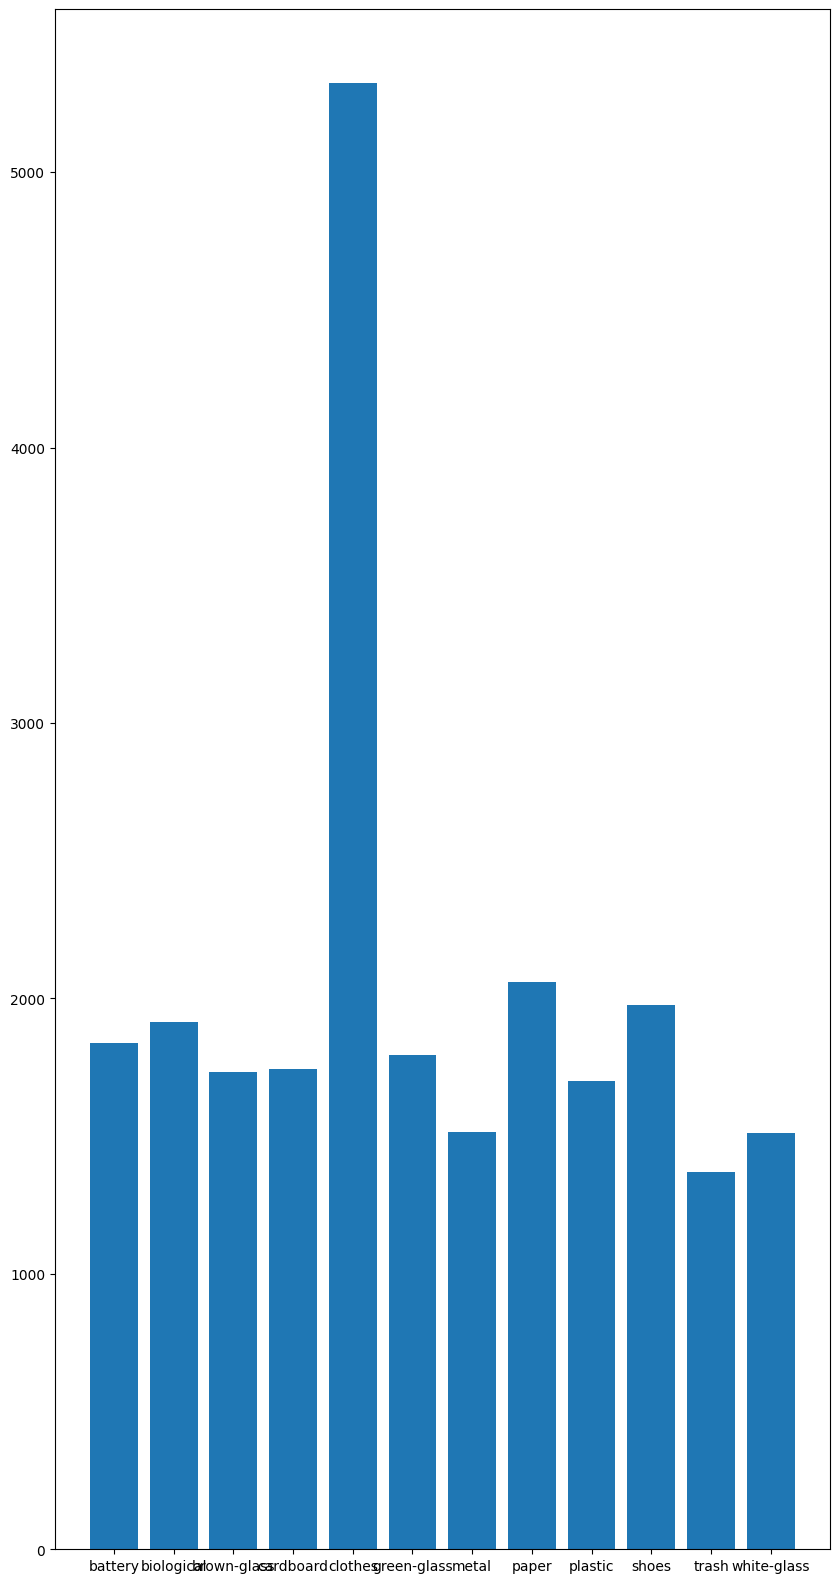

In [54]:

from matplotlib import pyplot as plt


plt.figure(figsize=(10,20))
mushroom_counts2 = [waste_counts.values()]

names = list(waste_counts.keys())
values = list(waste_counts.values())

plt.bar(range(len(waste_counts)), values, tick_label=names)

plt.show()



DATA AUGMENTATION

In [55]:
def augmentation():   
    data_gen = tf.keras.preprocessing.image.ImageDataGenerator(
        rotation_range=40, 
        width_shift_range=0.2,
        height_shift_range=0.2, 
        shear_range=0.2,
        zoom_range=0.2,
        fill_mode='nearest',
        horizontal_flip=True,
        
        )

    mn = sum(list(waste_counts.values())) // len(list(waste_counts.values()))



    for waste in waste_names:
        
        count = (mn)//(waste_counts[waste])

        img_counter = 0

        if count>0:

            for filename in os.listdir(f'{DATASET_DIR}//{waste}//'):
            
                img = load_img(f'{DATASET_DIR}//{waste}//{filename}')
                
                x = img_to_array(img)

                x = x.reshape((1,) + x.shape)

                for i in range(count):

                    data_gen.flow(x,batch_size=1, save_to_dir=(f'{DATASET_DIR}//{waste}'), save_prefix='IMG', save_format='.jpeg').next()
                        
                    img_counter +=1

            print(f"{waste} tamamlandı. {str(count+1)} kez {img_counter} resim üretildi...")

#augmentation()


In [56]:
waste_counts = {}    

for waste in waste_names:

    waste_counts[waste]=len(os.listdir(DATASET_DIR+"/"+waste))



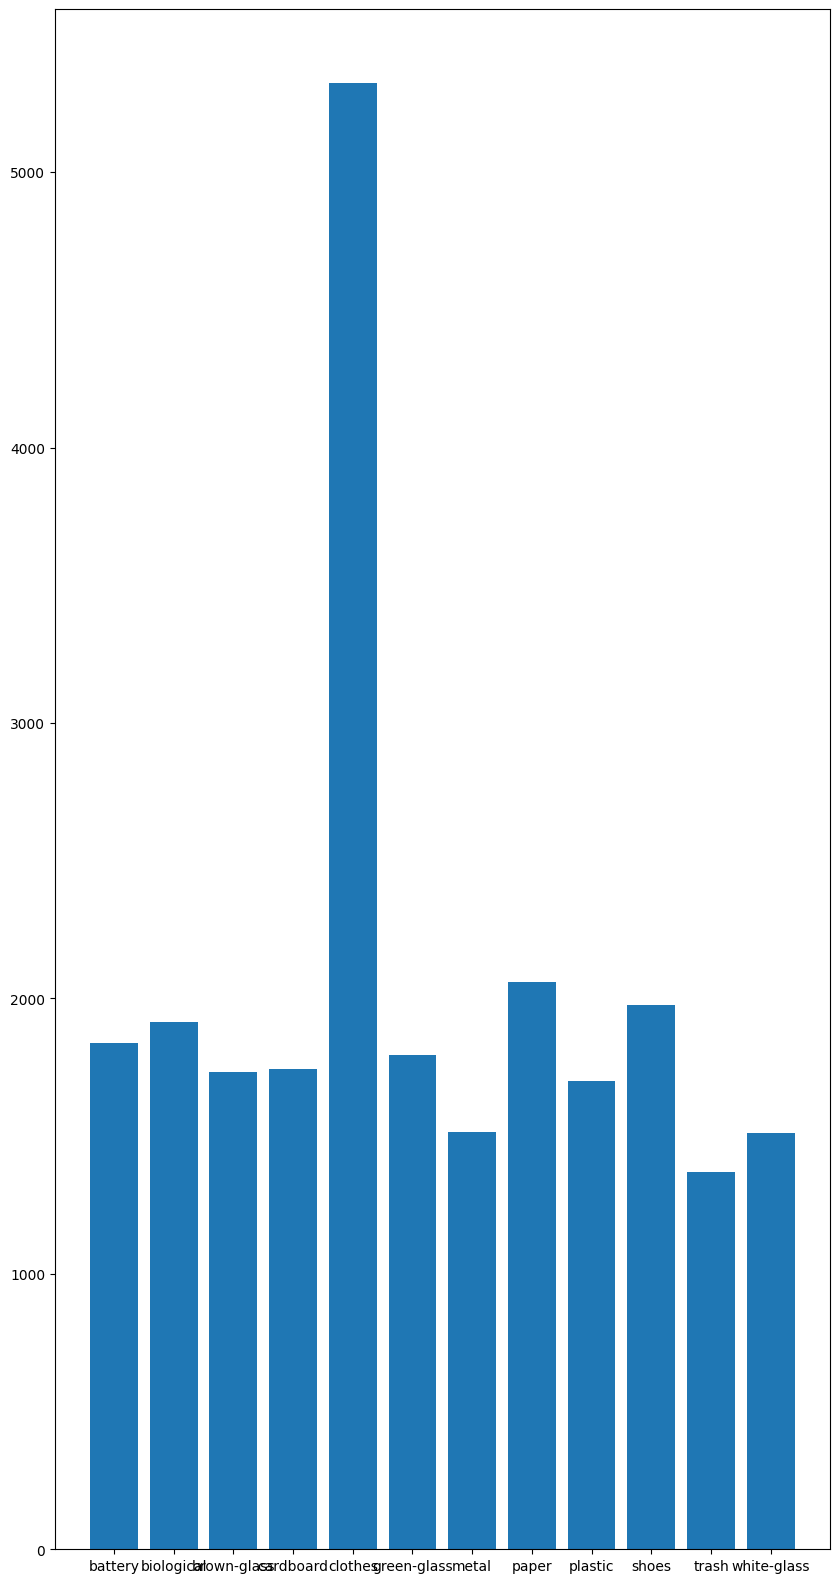

In [57]:
from matplotlib import pyplot as plt


plt.figure(figsize=(10,20))
mushroom_counts2 = [waste_counts.values()]

names = list(waste_counts.keys())
values = list(waste_counts.values())

plt.bar(range(len(waste_counts)), values, tick_label=names)

plt.show()



Tensorflow Part

In [58]:
from keras.preprocessing.image import image_dataset_from_directory

train_batchs = image_dataset_from_directory(

    						label_mode="int",
                           	subset="training",
                            validation_split=0.2,
        					seed=123,
                            directory=DATASET_DIR,
                            image_size=(224,224),
                            batch_size=10,
                            shuffle=True,
                           
                            )


valid_batchs = image_dataset_from_directory(	

    						label_mode="int",
                           	subset="validation",
        					seed=123,
                            validation_split=0.2,
                            directory=DATASET_DIR,
                            image_size=(224,224),
                            batch_size=10,
                            shuffle=True
                            
                            )

Found 24485 files belonging to 12 classes.
Using 19588 files for training.
Found 24485 files belonging to 12 classes.
Using 4897 files for validation.


In [59]:
classes=list(train_batchs.class_names)
class_indices=list(train_batchs.class_names)
num_of_classes=len(classes)
num_of_classes

12

In [60]:
print(list(train_batchs.class_names))

['battery', 'biological', 'brown-glass', 'cardboard', 'clothes', 'green-glass', 'metal', 'paper', 'plastic', 'shoes', 'trash', 'white-glass']


In [61]:
CLASS_NUM = len(train_batchs.class_names)
CLASS_NUM

12

In [62]:
values = list(train_batchs.take(1))[0]
values

(<tf.Tensor: shape=(10, 224, 224, 3), dtype=float32, numpy=
 array([[[[255.       , 255.       , 255.       ],
          [255.       , 255.       , 255.       ],
          [255.       , 255.       , 255.       ],
          ...,
          [255.       , 255.       , 255.       ],
          [255.       , 255.       , 255.       ],
          [255.       , 255.       , 255.       ]],
 
         [[255.       , 255.       , 255.       ],
          [255.       , 255.       , 255.       ],
          [255.       , 255.       , 255.       ],
          ...,
          [255.       , 255.       , 255.       ],
          [255.       , 255.       , 255.       ],
          [255.       , 255.       , 255.       ]],
 
         [[255.       , 255.       , 255.       ],
          [255.       , 255.       , 255.       ],
          [255.       , 255.       , 255.       ],
          ...,
          [255.       , 255.       , 255.       ],
          [255.       , 255.       , 255.       ],
          [255.       

In [63]:
imgs,labels = values[0],values[1]
imgs,labels

(<tf.Tensor: shape=(10, 224, 224, 3), dtype=float32, numpy=
 array([[[[255.       , 255.       , 255.       ],
          [255.       , 255.       , 255.       ],
          [255.       , 255.       , 255.       ],
          ...,
          [255.       , 255.       , 255.       ],
          [255.       , 255.       , 255.       ],
          [255.       , 255.       , 255.       ]],
 
         [[255.       , 255.       , 255.       ],
          [255.       , 255.       , 255.       ],
          [255.       , 255.       , 255.       ],
          ...,
          [255.       , 255.       , 255.       ],
          [255.       , 255.       , 255.       ],
          [255.       , 255.       , 255.       ]],
 
         [[255.       , 255.       , 255.       ],
          [255.       , 255.       , 255.       ],
          [255.       , 255.       , 255.       ],
          ...,
          [255.       , 255.       , 255.       ],
          [255.       , 255.       , 255.       ],
          [255.       

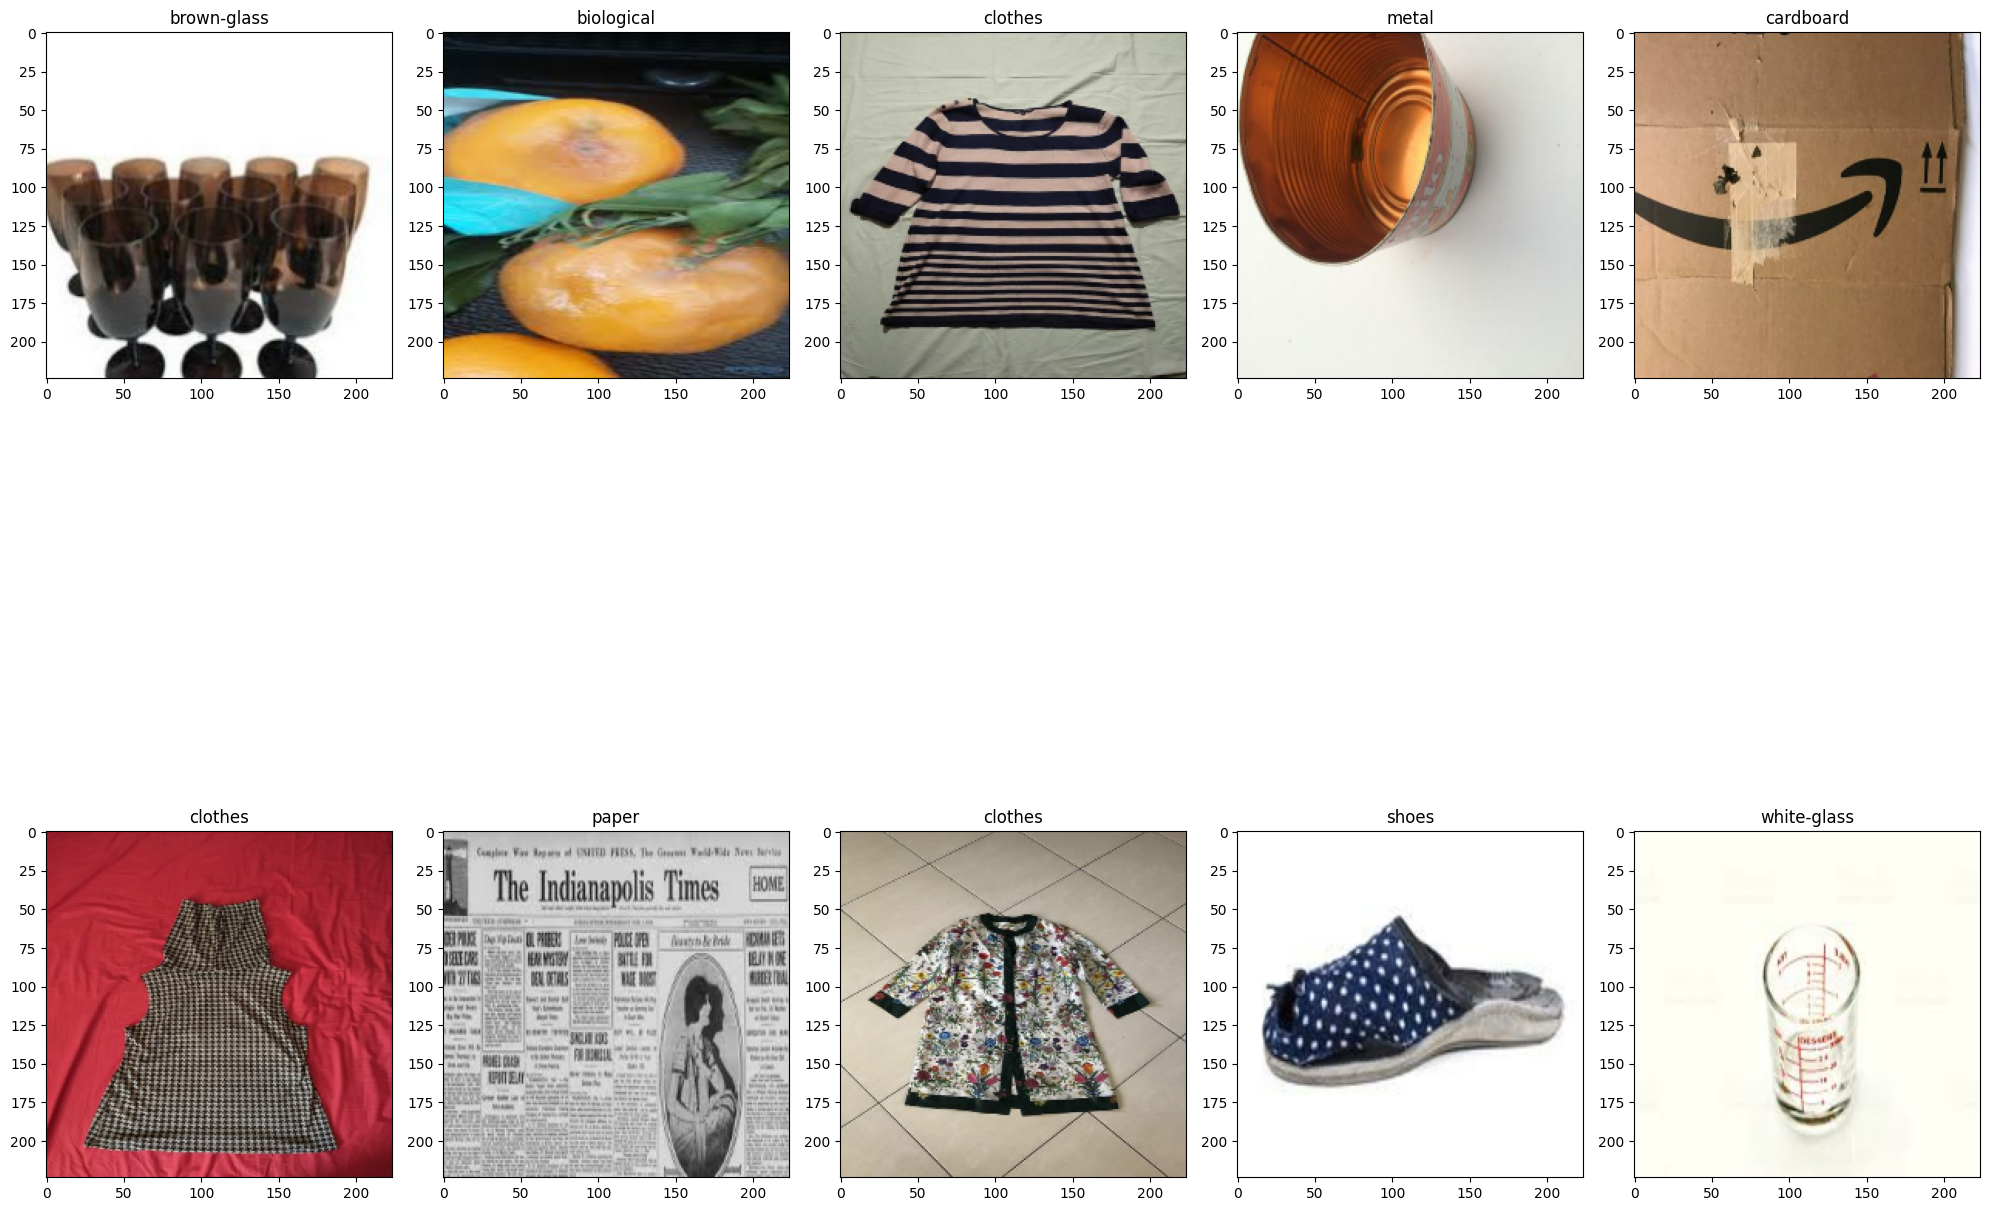

In [64]:
def plotImages(images,labels):
    
    fig,axes = plt.subplots(2,5,figsize=(20,20))
    
    axes = axes.flatten()
    
    for image,label,axe in zip(images,labels,axes):
        
        axe.imshow(image/255)
        axe.set_title(list(train_batchs.class_names)[int(label)])

    plt.tight_layout()
    plt.show()
    
    
plotImages(imgs,labels)

CREATE MODEL

In [65]:
resize_and_rescale = Sequential([

preprocessing.Resizing(224,224),
preprocessing.Rescaling(1.0/255)

])

data_augmention = Sequential([

preprocessing.RandomFlip("horizontal"),
preprocessing.RandomRotation(0.2),
preprocessing.RandomZoom(0.2),
preprocessing.RandomContrast(0.4),




])




In [66]:

model = Sequential()

model.add(Input(shape=(224,224,3)))

model.add(resize_and_rescale)

model.add(data_augmention)

model.add(Conv2D(input_shape=(224,224,3),filters=32,kernel_size=(3,3),padding="same",activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=2))
model.add(BatchNormalization())

model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same",activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())


model.add(Conv2D(filters=128,kernel_size=(3,3),padding="same",activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())

model.add(Conv2D(filters=256,kernel_size=(2,2),padding="same",activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())

model.add(Conv2D(filters=128,kernel_size=(2,2),padding="same",activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())




model.add(Flatten())
model.add(Dense(256))
model.add(Activation(relu))
model.add(BatchNormalization())


model.add(Dense(units=CLASS_NUM,activation="softmax"))


In [67]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_4 (Sequential)    (None, 224, 224, 3)       0         
_________________________________________________________________
sequential_5 (Sequential)    (None, 224, 224, 3)       0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 224, 224, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 112, 112, 32)      0         
_________________________________________________________________
batch_normalization_6 (Batch (None, 112, 112, 32)      128       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 112, 112, 64)      18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 56, 56, 64)       

In [68]:
model.compile(Adam(learning_rate=0.0005),SparseCategoricalCrossentropy(from_logits=False),metrics=["accuracy"])

In [69]:
model.load_weights("model\saved-model-10-0.87.hdf5")

In [70]:
es = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', mode='max', patience=5,  restore_best_weights=True)
filepath = "model/saved-model-{epoch:02d}-{val_accuracy:.2f}.hdf5"
checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath, monitor='val_accuracy', save_best_only=True, mode='max')
model.fit(x=train_batchs,validation_data=(valid_batchs),workers=-1,epochs=100,verbose=1, callbacks=[es,checkpoint])

Epoch 1/100


1959/1959 [==============================] - 111s 56ms/step - loss: 0.4663 - accuracy: 0.8441 - val_loss: 0.5792 - val_accuracy: 0.8389
Epoch 2/100
1959/1959 [==============================] - 111s 57ms/step - loss: 0.4535 - accuracy: 0.8479 - val_loss: 0.5507 - val_accuracy: 0.8326
Epoch 3/100
1959/1959 [==============================] - 105s 53ms/step - loss: 0.4611 - accuracy: 0.8463 - val_loss: 0.5772 - val_accuracy: 0.8375
Epoch 4/100
1959/1959 [==============================] - 103s 53ms/step - loss: 0.4362 - accuracy: 0.8516 - val_loss: 0.5102 - val_accuracy: 0.8481
Epoch 5/100
1959/1959 [==============================] - 106s 54ms/step - loss: 0.4103 - accuracy: 0.8628 - val_loss: 0.6332 - val_accuracy: 0.8258
Epoch 6/100
1959/1959 [==============================] - 106s 54ms/step - loss: 0.4254 - accuracy: 0.8580 - val_loss: 0.5590 - val_accuracy: 0.8579
Epoch 7/100
1959/1959 [==============================] - 107s 54ms/step - loss: 0.4197 - accuracy: 0.8594 - val_loss: 0.5463

In [71]:
if os.path.isdir("model/model.h5") is False:
    model.save("model/model.h5")

In [77]:
output = model.evaluate(x=valid_batchs,verbose=1)
output 

490/490 [==============================] - 10s 19ms/step - loss: 0.4411 - accuracy: 0.8724


[0.44109684228897095, 0.8723708391189575]

In [76]:
model.load_weights("model\saved-model-10-0.87.hdf5")

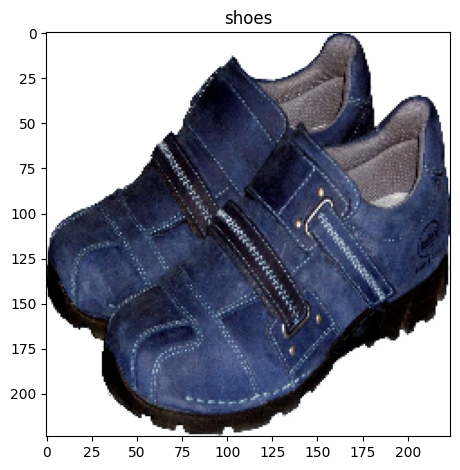

In [88]:
def predictImages(image):
    import cv2
   
    img = cv2.resize(cv2.imread(image),(224,224)) 
    
    plt.imshow(img)

    img = np.expand_dims(img, axis=0)

    plt.title(list(train_batchs.class_names)[np.argmax(np.squeeze(model.predict(np.array(img))))])

    plt.tight_layout()
    plt.show()
    
    
predictImages("test images\shoes.jpg")

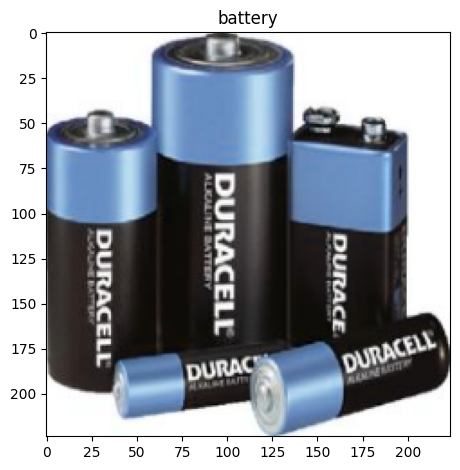

In [90]:
def predictImages(image):
    import cv2
   
    img = cv2.resize(cv2.imread(image),(224,224)) 
    
    plt.imshow(img)

    img = np.expand_dims(img, axis=0)

    plt.title(list(train_batchs.class_names)[np.argmax(np.squeeze(model.predict(np.array(img))))])

    plt.tight_layout()
    plt.show()
    
    
predictImages("test images\\battery.jpg")